Amanda Renata - 0706022310010
Ruby Golden - 0706022310035
Sherin Yonatan - 0706022310013

In [1]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams
from pmdarima import auto_arima
from xgboost import XGBRegressor

Step data preparation and data cleaning

In [2]:
url = "https://raw.githubusercontent.com/rubyarthalia/Python/247869a3b5839c23d403265e6510f15264c46678/Data%20Science%20ALP/Oil.csv"

Oil_Prices = pd.read_csv(url,delimiter=";")
Oil_Prices

,Tanggal,Oil
0,Dec-98,"10,41"
1,Jan-99,"11,44"
2,Feb-99,"10,75"
3,Mar-99,"13,17"
4,Apr-99,"15,87"
...,...,...
309,Sep-24,"72,42"
310,Oct-24,"73,97"
311,Nov-24,"72,29"
312,Dec-24,"72,31"


In [3]:
Oil_Prices.dtypes

Tanggal    object
Oil        object
dtype: object

In [4]:
Oil_Prices.isnull().sum()

Tanggal    0
Oil        0
dtype: int64

In [5]:
Oil_Prices['Tanggal'] = pd.to_datetime(Oil_Prices['Tanggal'], format='%b-%y')
Oil_Prices['Oil'] = Oil_Prices['Oil'].str.replace(',', '.', regex=False).astype(float)
Oil_Prices.rename(columns={'Tanggal': 'Periode'}, inplace=True)
Oil_Prices.rename(columns={'Oil': 'Harga'}, inplace=True)
Oil_Prices

,Periode,Harga
0,1998-12-01,10.41
1,1999-01-01,11.44
2,1999-02-01,10.75
3,1999-03-01,13.17
4,1999-04-01,15.87
...,...,...
309,2024-09-01,72.42
310,2024-10-01,73.97
311,2024-11-01,72.29
312,2024-12-01,72.31


In [6]:
url = "https://raw.githubusercontent.com/rubyarthalia/Python/247869a3b5839c23d403265e6510f15264c46678/Data%20Science%20ALP/Inflation.csv"
Inflation = pd.read_csv(url, delimiter=';')
Inflation

,Tanggal,Data
0,Dec-98,1.41 %
1,Jan-99,2.96 %
2,Feb-99,1.27 %
3,Mar-99,-0.19 %
4,Apr-99,-0.67 %
...,...,...
309,Sep-24,-0.12 %
310,Oct-24,0.08 %
311,Nov-24,0.30 %
312,Dec-24,0.44 %


In [7]:
Inflation.dtypes

Tanggal    object
Data       object
dtype: object

In [8]:
Inflation.isnull().sum()

Tanggal    0
Data       0
dtype: int64

In [9]:
Inflation['Tanggal'] = pd.to_datetime(Inflation['Tanggal'], format='%b-%y')
Inflation['Data'] = Inflation['Data'].str.replace(',', '.', regex=False).str.replace('%', '', regex=False).astype(float) / 100
Inflation.rename(columns={'Tanggal': 'Periode'}, inplace=True)
Inflation.rename(columns={'Data': 'Inflation Rate'}, inplace=True)
Inflation

,Periode,Inflation Rate
0,1998-12-01,0.0141
1,1999-01-01,0.0296
2,1999-02-01,0.0127
3,1999-03-01,-0.0019
4,1999-04-01,-0.0067
...,...,...
309,2024-09-01,-0.0012
310,2024-10-01,0.0008
311,2024-11-01,0.0030
312,2024-12-01,0.0044


In [10]:
url = "https://raw.githubusercontent.com/rubyarthalia/Python/247869a3b5839c23d403265e6510f15264c46678/Data%20Science%20ALP/Exchange%20Rate.csv"
Exchange_Rate = pd.read_csv(url, delimiter=';')
Exchange_Rate

,Tanggal,Harga (IDR-USD)
0,Dec-98,8000.0
1,Jan-99,8850.0
2,Feb-99,8800.0
3,Mar-99,8650.0
4,Apr-99,8017.5
...,...,...
309,Sep-24,15135.0
310,Oct-24,15690.0
311,Nov-24,15840.0
312,Dec-24,16090.0


In [11]:
Exchange_Rate.dtypes

Tanggal             object
Harga (IDR-USD)    float64
dtype: object

In [12]:
Exchange_Rate.isnull().sum()

Tanggal            0
Harga (IDR-USD)    0
dtype: int64

In [13]:
Exchange_Rate['Tanggal'] = pd.to_datetime(Exchange_Rate['Tanggal'], format='%b-%y')
Exchange_Rate.rename(columns={'Tanggal': 'Periode'}, inplace=True)
Exchange_Rate

,Periode,Harga (IDR-USD)
0,1998-12-01,8000.0
1,1999-01-01,8850.0
2,1999-02-01,8800.0
3,1999-03-01,8650.0
4,1999-04-01,8017.5
...,...,...
309,2024-09-01,15135.0
310,2024-10-01,15690.0
311,2024-11-01,15840.0
312,2024-12-01,16090.0


In [14]:
url = "https://raw.githubusercontent.com/rubyarthalia/Python/247869a3b5839c23d403265e6510f15264c46678/Data%20Science%20ALP/BI%20Rate.csv"
Interest_Rate = pd.read_csv(url)
Interest_Rate

,Bulan,BI Rate
0,Dec-98,38.44
1,Jan-99,36.43
2,Feb-99,37.50
3,Mar-99,37.84
4,Apr-99,35.19
...,...,...
309,Sep-24,6.00
310,Oct-24,6.00
311,Nov-24,6.00
312,Dec-24,6.00


In [15]:
Interest_Rate.dtypes

Bulan       object
BI Rate    float64
dtype: object

In [16]:
Interest_Rate.isnull().sum()

Bulan      0
BI Rate    0
dtype: int64

In [17]:
Interest_Rate['Bulan'] = pd.to_datetime(Interest_Rate['Bulan'], format='%b-%y')
Interest_Rate.rename(columns={'BI Rate': 'Interest Rate'}, inplace=True)
Interest_Rate.rename(columns={'Bulan': 'Periode'}, inplace=True)
Interest_Rate

,Periode,Interest Rate
0,1998-12-01,38.44
1,1999-01-01,36.43
2,1999-02-01,37.50
3,1999-03-01,37.84
4,1999-04-01,35.19
...,...,...
309,2024-09-01,6.00
310,2024-10-01,6.00
311,2024-11-01,6.00
312,2024-12-01,6.00


In [18]:
url = "https://raw.githubusercontent.com/rubyarthalia/Python/247869a3b5839c23d403265e6510f15264c46678/Data%20Science%20ALP/Gold.csv"
Gold_Prices = pd.read_csv(url, delimiter=';')
Gold_Prices

,Tanggal,Gold
0,Dec-98,"291,68"
1,Jan-99,"287,08"
2,Feb-99,"287,33"
3,Mar-99,"285,96"
4,Apr-99,"282,62"
...,...,...
309,Sep-24,"2570,55"
310,Oct-24,"2690,08"
311,Nov-24,"2651,13"
312,Dec-24,"2648,01"


In [19]:
Gold_Prices.dtypes

Tanggal    object
Gold       object
dtype: object

In [20]:
Gold_Prices.isnull().sum()

Tanggal    0
Gold       0
dtype: int64

In [21]:
Gold_Prices['Tanggal'] = pd.to_datetime(Gold_Prices['Tanggal'], format='%b-%y')
Gold_Prices['Gold'] = Gold_Prices['Gold'].str.replace(',', '.', regex=False).astype(float)
Gold_Prices.rename(columns={'Gold': 'Harga'}, inplace=True)
Gold_Prices.rename(columns={'Tanggal': 'Periode'}, inplace=True)
Gold_Prices['Harga_Sebelumnya'] = Gold_Prices['Harga'].shift(1)
Gold_Prices

,Periode,Harga,Harga_Sebelumnya
0,1998-12-01,291.68,NaN
1,1999-01-01,287.08,291.68
2,1999-02-01,287.33,287.08
3,1999-03-01,285.96,287.33
4,1999-04-01,282.62,285.96
...,...,...,...
309,2024-09-01,2570.55,2470.15
310,2024-10-01,2690.08,2570.55
311,2024-11-01,2651.13,2690.08
312,2024-12-01,2648.01,2651.13


The step below is the process of combining the data that will be used. <br>
Notes: A new column, 'Price Before', has been added for the XGBoost calculation.

In [22]:
data_terolah = pd.concat([
    Gold_Prices['Periode'],
    Oil_Prices['Harga'].rename('Oil Price'),
    Inflation['Inflation Rate'],
    Exchange_Rate['Harga (IDR-USD)'].rename('Exchange Rate'),
    Interest_Rate['Interest Rate'],
    Gold_Prices['Harga'].rename('Gold Prices'),
    Gold_Prices['Harga_Sebelumnya'].rename('Price Before')
], axis=1)
data_terolah

,Periode,Oil Price,Inflation Rate,Exchange Rate,Interest Rate,Gold Prices,Price Before
0,1998-12-01,10.41,0.0141,8000.0,38.44,291.68,NaN
1,1999-01-01,11.44,0.0296,8850.0,36.43,287.08,291.68
2,1999-02-01,10.75,0.0127,8800.0,37.50,287.33,287.08
3,1999-03-01,13.17,-0.0019,8650.0,37.84,285.96,287.33
4,1999-04-01,15.87,-0.0067,8017.5,35.19,282.62,285.96
...,...,...,...,...,...,...,...
309,2024-09-01,72.42,-0.0012,15135.0,6.00,2570.55,2470.15
310,2024-10-01,73.97,0.0008,15690.0,6.00,2690.08,2570.55
311,2024-11-01,72.29,0.0030,15840.0,6.00,2651.13,2690.08
312,2024-12-01,72.31,0.0044,16090.0,6.00,2648.01,2651.13


In [23]:
data_terolah.dropna(inplace=True)

In [24]:
data_terolah

,Periode,Oil Price,Inflation Rate,Exchange Rate,Interest Rate,Gold Prices,Price Before
1,1999-01-01,11.44,0.0296,8850.0,36.43,287.08,291.68
2,1999-02-01,10.75,0.0127,8800.0,37.50,287.33,287.08
3,1999-03-01,13.17,-0.0019,8650.0,37.84,285.96,287.33
4,1999-04-01,15.87,-0.0067,8017.5,35.19,282.62,285.96
5,1999-05-01,16.06,-0.0029,8115.0,28.73,276.44,282.62
...,...,...,...,...,...,...,...
309,2024-09-01,72.42,-0.0012,15135.0,6.00,2570.55,2470.15
310,2024-10-01,73.97,0.0008,15690.0,6.00,2690.08,2570.55
311,2024-11-01,72.29,0.0030,15840.0,6.00,2651.13,2690.08
312,2024-12-01,72.31,0.0044,16090.0,6.00,2648.01,2651.13


This step is the determination of X and Y (we use X1 and so on because we want to see the influence of each variable individually rather than collectively) and also the step of splitting the data into train and test sets.

In [25]:
y = data_terolah['Gold Prices']
X1 = data_terolah['Oil Price']
X2 = data_terolah['Inflation Rate']
X3 = data_terolah['Exchange Rate']
X4 = data_terolah['Interest Rate']
X5 = data_terolah[['Oil Price','Inflation Rate','Exchange Rate','Interest Rate']]

In [26]:
train_size = int(len(y) * 0.85) 

train_y = y[:train_size]       
test_y = y[train_size:]        

train_X1 = X1[:train_size]
test_X1 = X1[train_size:]

train_X2 = X2[:train_size]
test_X2 = X2[train_size:]

train_X3 = X3[:train_size]
test_X3 = X3[train_size:]

train_X4 = X4[:train_size]
test_X4 = X4[train_size:]

train_X5 = X5[:train_size]
test_X5 = X5[train_size:]

This step is to check the correlation between Y and X

<Axes: >

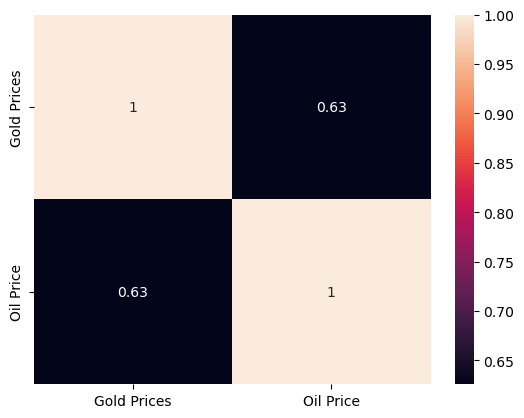

In [27]:
import seaborn as sns
data = pd.concat([train_y, train_X1], axis=1)
sns.heatmap(data.corr(), annot=True)

The result is that Gold Price and Oil Price has a STRONG POSITIF CORRELATION <br>
Meaning: When oil prices rise, gold prices tend to rise as well.

<Axes: >

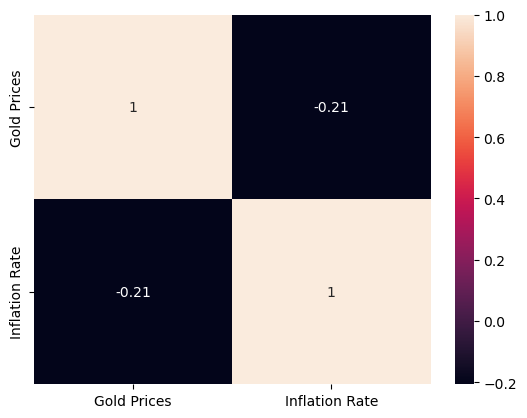

In [28]:
data = pd.concat([train_y, train_X2], axis=1)
sns.heatmap(data.corr(), annot=True)

The result is that Gold Price and Inflation Rate has a WEAK NEGATIF CORRELATION <br>
Meaning: Gold prices may slightly decrease when inflation rises.

<Axes: >

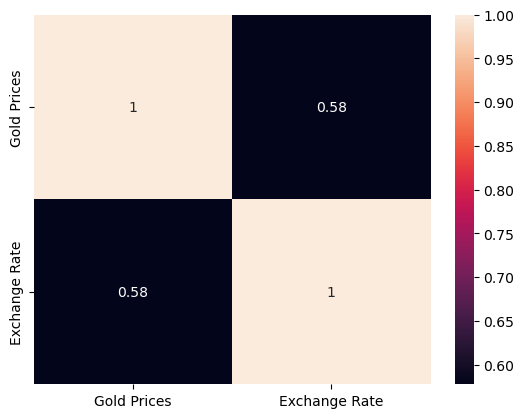

In [29]:
data = pd.concat([train_y, train_X3], axis=1)
sns.heatmap(data.corr(), annot=True)


The result is that Gold Price and Inflation Rate has a MODERATE POSITIF CORRELATION <br>
Meaning: Gold prices generally rise with inflation. 

<Axes: >

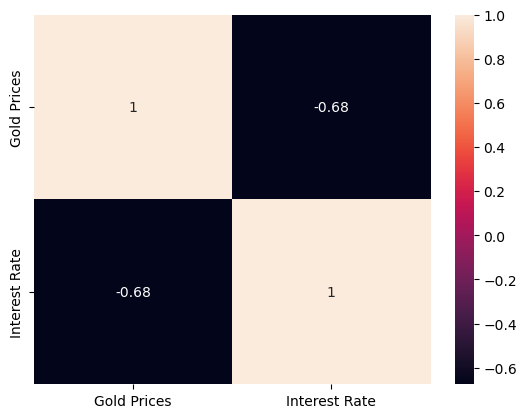

In [30]:
data = pd.concat([train_y, train_X4], axis=1)
sns.heatmap(data.corr(), annot=True)

The result is that Gold Price and Inflation Rate has a MODERATE NEGATIF CORRELATION <br>
Meaning: Gold prices tend to decline moderately during high inflation.

<Axes: >

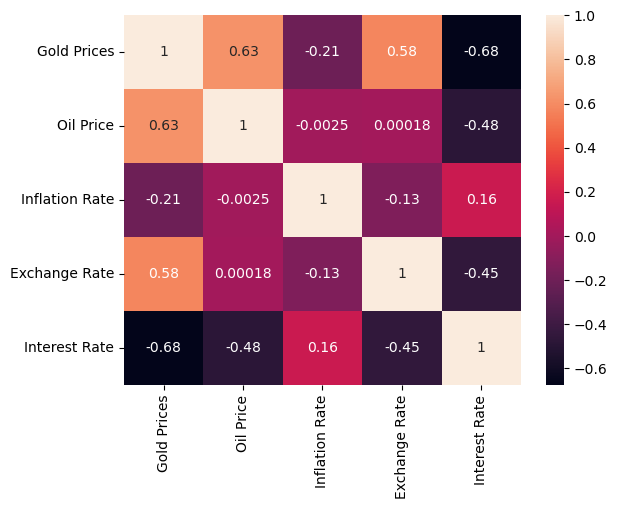

In [31]:
data = pd.concat([train_y, train_X5], axis=1)
sns.heatmap(data.corr(), annot=True)

We use ARIMAX because we have X

In [32]:
future_exog1 = pd.DataFrame({
    'Oil Price': [73.82, 70.70, 65.91, 60.46]
}, index=pd.date_range(start='2025-02-01', periods=4, freq='MS'))

future_exog2 = pd.DataFrame({
    'Inflation Rate': [0.0076, 0.0084, 0.0040, 0.002]
}, index=pd.date_range(start='2025-02-01', periods=4, freq='MS'))

future_exog3 = pd.DataFrame({
    'Exchange Rate': [16.453, 16.506, 16.849, 16.493]
}, index=pd.date_range(start='2025-02-01', periods=4, freq='MS'))

future_exog4 = pd.DataFrame({
     'Interest Rate': [5.75, 5.75, 5.75, 5.5]
}, index=pd.date_range(start='2025-02-01', periods=4, freq='MS'))

future_exog5 = pd.DataFrame({
    'Oil Price': [73.82, 70.70, 65.91, 60.46],
    'Inflation Rate': [0.0076, 0.0084, 0.0040, 0.002],
    'Exchange Rate': [16.453, 16.506, 16.849, 16.493],
    'Interest Rate': [5.75, 5.75, 5.75, 5.5]
}, index=pd.date_range(start='2025-02-01', periods=4, freq='MS'))


In [33]:
print(future_exog1.shape)


(4, 1)


c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Gold Prices   No. Observations:                  266
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1341.233
Date:                Sat, 07 Jun 2025   AIC                           2690.466
Time:                        16:47:14   BIC                           2704.785
Sample:                             0   HQIC                          2696.219
                                - 266                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Oil Price      0.8775      0.403      2.177      0.030       0.087       1.668
ar.L1         -0.5761      0.130     -4.425      0.000      -0.831      -0.321
ma.L1          0.7512      0.106      7.103      0.0

c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


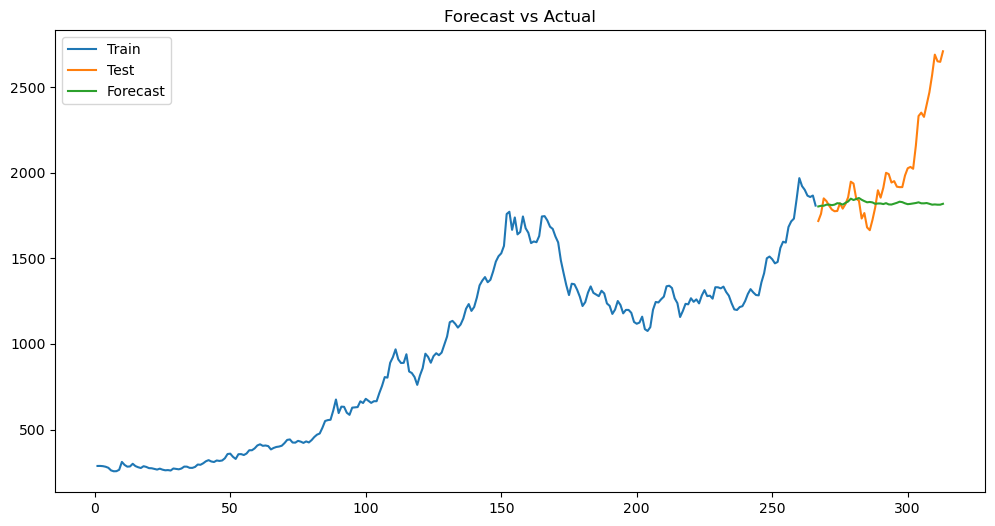

MSE: 119046.9372
MAE: 220.6244
RMSE: 345.0318
MAPE: 0.0963


In [34]:
# X1 
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_arimax = SARIMAX(train_y, exog=train_X1, order=(1,1,1), seasonal_order=(0,0,0,0))
result = model_arimax.fit()
print(result.summary())


def evaluate_model(result, test_y, test_X):
    start = len(train_y)
    end = start + len(test_y) - 1
    forecast = result.predict(start=start, end=end, exog=test_X)
    
    plt.figure(figsize=(12,6))
    plt.plot(train_y.index, train_y, label='Train')
    plt.plot(test_y.index, test_y, label='Test')
    plt.plot(test_y.index, forecast, label='Forecast')
    plt.legend()
    plt.title(f'Forecast vs Actual')
    plt.show()
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
    mae = mean_absolute_error(test_y, forecast)
    mse = mean_squared_error(test_y, forecast)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test_y, forecast)
    
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.4f}")
    
    return forecast

arimax_forecast = evaluate_model(result, test_y, test_X1)


In [35]:
n_steps = 4
future_forecast = result.predict(
    start=len(train_y),
    end=len(train_y) + n_steps - 1,
    exog=future_exog1[:n_steps]
)
print(future_forecast)


266    1811.932260
267    1813.781115
268    1806.935444
269    1803.675624
Name: predicted_mean, dtype: float64


c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


                               SARIMAX Results                                
Dep. Variable:            Gold Prices   No. Observations:                  266
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1342.884
Date:                Sat, 07 Jun 2025   AIC                           2693.769
Time:                        16:47:14   BIC                           2708.088
Sample:                             0   HQIC                          2699.522
                                - 266                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Inflation Rate  -261.5017    324.447     -0.806      0.420    -897.405     374.402
ar.L1              0.0228      0.214      0.107      0.915      -0.397       0.442
ma.L1              0.1882      0.212

c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


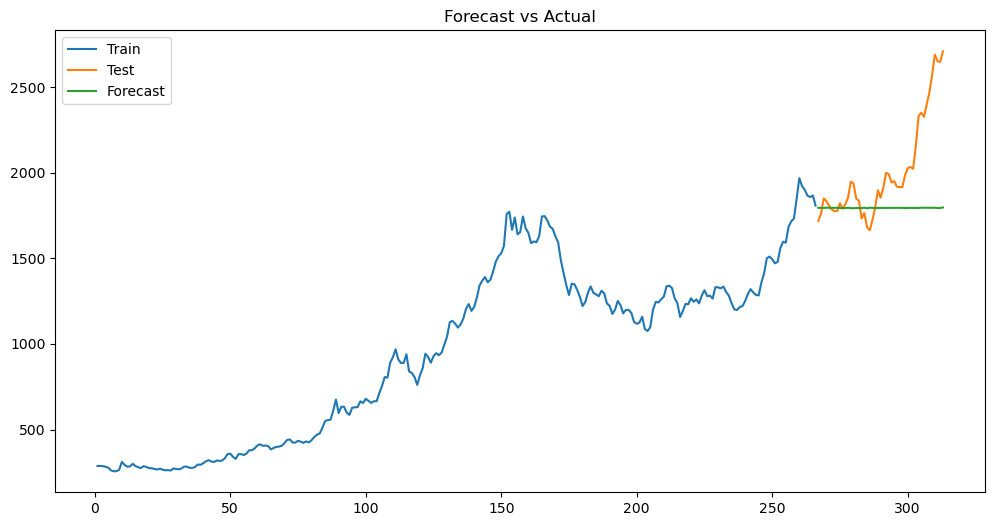

MSE: 128342.5231
MAE: 233.7492
RMSE: 358.2492
MAPE: 0.1022


In [36]:
# X2
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_arimax = SARIMAX(train_y, exog=train_X2, order=(1,1,1), seasonal_order=(0,0,0,0))
result = model_arimax.fit()
print(result.summary())

def evaluate_model(result, test_y, test_X):
    start = len(train_y)
    end = start + len(test_y) - 1
    forecast = result.predict(start=start, end=end, exog=test_X)
    
    plt.figure(figsize=(12,6))
    plt.plot(train_y.index, train_y, label='Train')
    plt.plot(test_y.index, test_y, label='Test')
    plt.plot(test_y.index, forecast, label='Forecast')
    plt.legend()
    plt.title(f'Forecast vs Actual')
    plt.show()
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
    mae = mean_absolute_error(test_y, forecast)
    mse = mean_squared_error(test_y, forecast)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test_y, forecast)
    
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.4f}")
    
    return forecast

arimax_forecast = evaluate_model(result, test_y, test_X2)


In [37]:
n_steps = 4
future_forecast = result.predict(
    start=len(train_y),
    end=len(train_y) + n_steps - 1,
    exog=future_exog2[:n_steps]
)
print(future_forecast)


266    1793.618116
267    1793.116432
268    1794.260370
269    1794.783222
Name: predicted_mean, dtype: float64


c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Gold Prices   No. Observations:                  266
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1339.779
Date:                Sat, 07 Jun 2025   AIC                           2687.558
Time:                        16:47:14   BIC                           2701.877
Sample:                             0   HQIC                          2693.311
                                - 266                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Exchange Rate    -0.0144      0.006     -2.245      0.025      -0.027      -0.002
ar.L1            -0.2720      0.177     -1.537      0.124      -0.619       0.075
ma.L1             0.4861      0.165     

c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


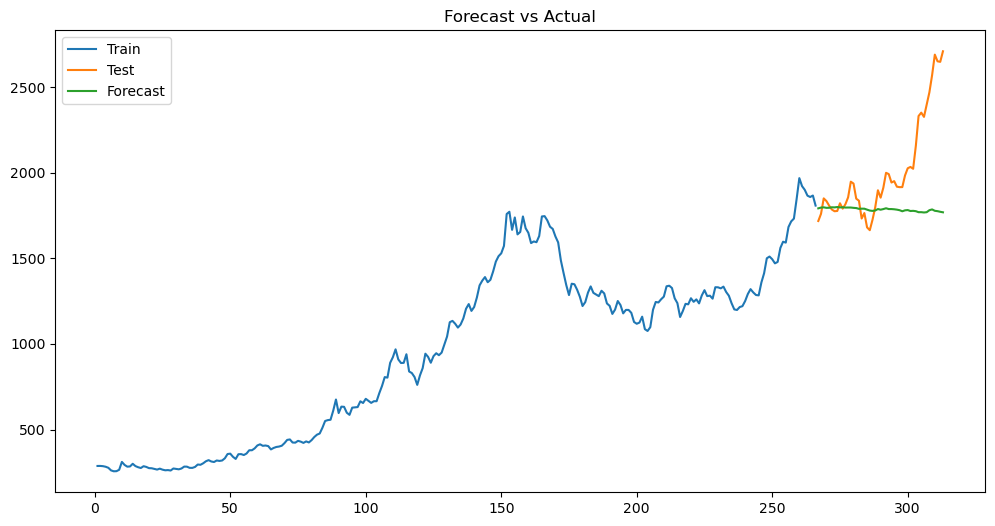

MSE: 136094.5600
MAE: 241.2319
RMSE: 368.9100
MAPE: 0.1054


In [38]:
# X3
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_arimax = SARIMAX(train_y, exog=train_X3, order=(1,1,1), seasonal_order=(0,0,0,0))
result = model_arimax.fit()
print(result.summary())

def evaluate_model(result, test_y, test_X):
    start = len(train_y)
    end = start + len(test_y) - 1
    forecast = result.predict(start=start, end=end, exog=test_X)
    
    plt.figure(figsize=(12,6))
    plt.plot(train_y.index, train_y, label='Train')
    plt.plot(test_y.index, test_y, label='Test')
    plt.plot(test_y.index, forecast, label='Forecast')
    plt.legend()
    plt.title(f'Forecast vs Actual')
    plt.show()
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
    mae = mean_absolute_error(test_y, forecast)
    mse = mean_squared_error(test_y, forecast)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test_y, forecast)
    
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.4f}")
    
    return forecast

arimax_forecast = evaluate_model(result, test_y, test_X3)


In [39]:
n_steps = 4
future_forecast = result.predict(
    start=len(train_y),
    end=len(train_y) + n_steps - 1,
    exog=future_exog3[:n_steps]
)
print(future_forecast)


266    2001.276269
267    2004.550664
268    2003.654796
269    2003.902282
Name: predicted_mean, dtype: float64


c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


                               SARIMAX Results                                
Dep. Variable:            Gold Prices   No. Observations:                  266
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1342.803
Date:                Sat, 07 Jun 2025   AIC                           2693.606
Time:                        16:47:15   BIC                           2707.925
Sample:                             0   HQIC                          2699.359
                                - 266                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Interest Rate    -0.5153      9.709     -0.053      0.958     -19.545      18.514
ar.L1            -0.0804      0.197     -0.408      0.683      -0.467       0.306
ma.L1             0.3007      0.192     

c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


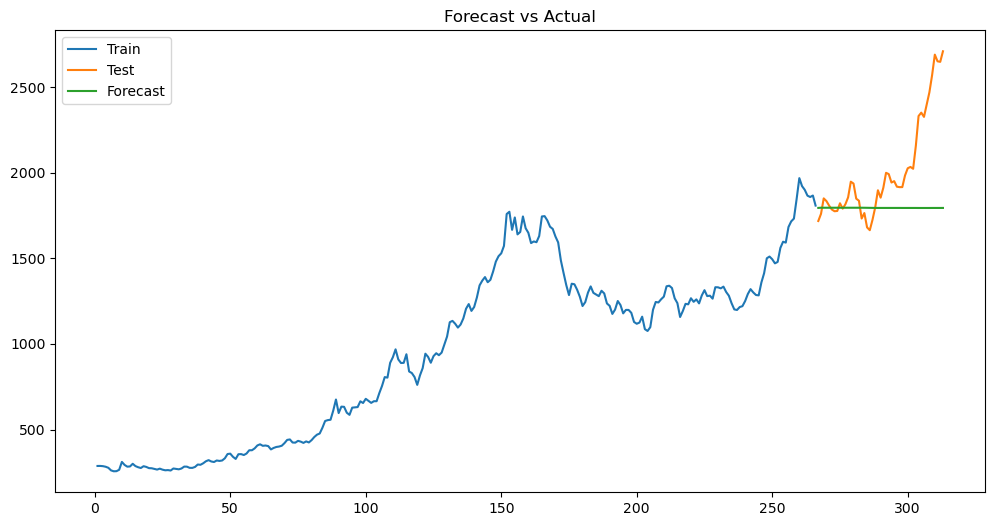

MSE: 128642.8331
MAE: 233.8846
RMSE: 358.6681
MAPE: 0.1022


In [40]:
# X4
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_arimax = SARIMAX(train_y, exog=train_X4, order=(1,1,1), seasonal_order=(0,0,0,0))
result = model_arimax.fit()
print(result.summary())

def evaluate_model(result, test_y, test_X):
    start = len(train_y)
    end = start + len(test_y) - 1
    forecast = result.predict(start=start, end=end, exog=test_X)
    
    plt.figure(figsize=(12,6))
    plt.plot(train_y.index, train_y, label='Train')
    plt.plot(test_y.index, test_y, label='Test')
    plt.plot(test_y.index, forecast, label='Forecast')
    plt.legend()
    plt.title(f'Forecast vs Actual')
    plt.show()
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
    mae = mean_absolute_error(test_y, forecast)
    mse = mean_squared_error(test_y, forecast)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test_y, forecast)
    
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.4f}")
    
    return forecast

arimax_forecast = evaluate_model(result, test_y, test_X4)


In [41]:
n_steps = 4
future_forecast = result.predict(
    start=len(train_y),
    end=len(train_y) + n_steps - 1,
    exog=future_exog4[:n_steps]
)
print(future_forecast)


266    1793.501389
267    1794.586877
268    1794.499656
269    1794.635495
Name: predicted_mean, dtype: float64


c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Gold Prices   No. Observations:                  266
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1338.655
Date:                Sat, 07 Jun 2025   AIC                           2691.310
Time:                        16:47:15   BIC                           2716.368
Sample:                             0   HQIC                          2701.378
                                - 266                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Oil Price          0.7546      0.398      1.895      0.058      -0.026       1.535
Inflation Rate  -271.1856    321.235     -0.844      0.399    -900.795     358.424
Exchange Rate     -0.0134      0.006

c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


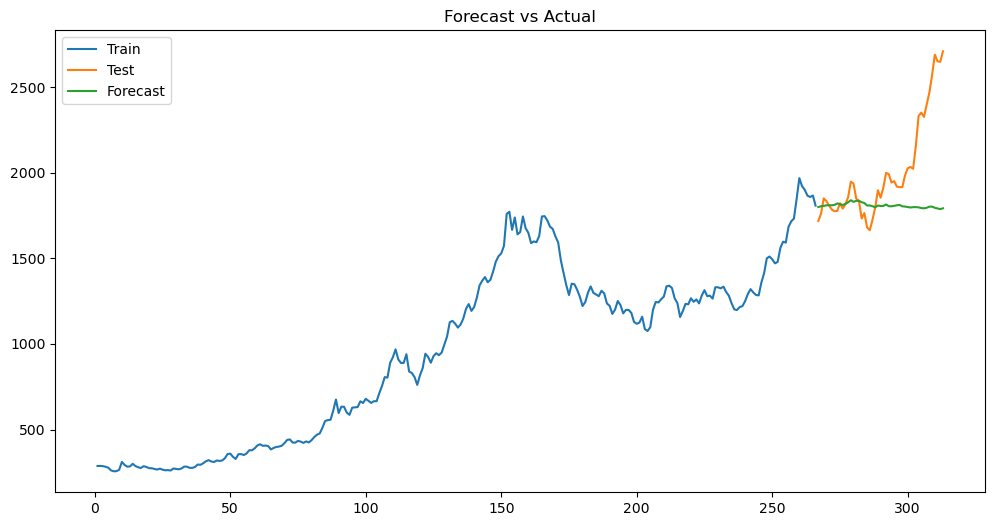

MSE: 127304.6550
MAE: 228.6068
RMSE: 356.7978
MAPE: 0.0996


In [42]:
# X5
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_arimax = SARIMAX(train_y, exog=train_X5, order=(1,1,1), seasonal_order=(0,0,0,0))
result = model_arimax.fit()
print(result.summary())

def evaluate_model(result, test_y, test_X):
    start = len(train_y)
    end = start + len(test_y) - 1
    forecast = result.predict(start=start, end=end, exog=test_X)
    
    plt.figure(figsize=(12,6))
    plt.plot(train_y.index, train_y, label='Train')
    plt.plot(test_y.index, test_y, label='Test')
    plt.plot(test_y.index, forecast, label='Forecast')
    plt.legend()
    plt.title(f'Forecast vs Actual')
    plt.show()
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
    mae = mean_absolute_error(test_y, forecast)
    mse = mean_squared_error(test_y, forecast)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test_y, forecast)
    
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.4f}")
    
    return forecast

arimax_forecast = evaluate_model(result, test_y, test_X5)


In [43]:
n_steps = 4
future_forecast = result.predict(
    start=len(train_y),
    end=len(train_y) + n_steps - 1,
    exog=future_exog5[:n_steps]
)
print(future_forecast)


266    2000.836482
267    2002.494747
268    1997.587015
269    1995.390177
Name: predicted_mean, dtype: float64


c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\amand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


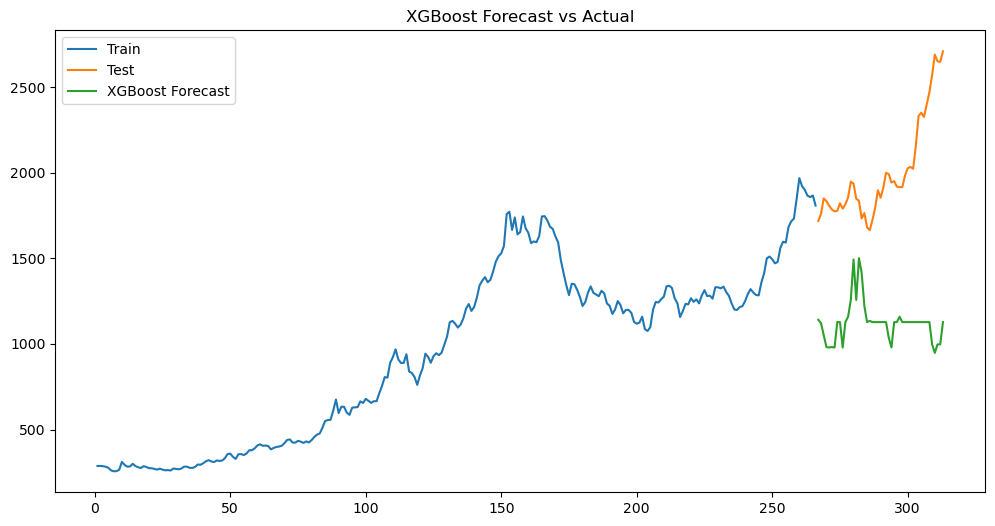

Evaluation Metrics:
MSE: 890574.8294
MAE: 880.2063
RMSE: 943.70
MAPE: 0.43
Forecast Gold Price for Future Dates:
            Forecast Gold Price
2025-02-01           947.665833
2025-03-01           981.986267
2025-04-01           983.612732
2025-05-01          1354.831177


In [44]:
model_XGBoost = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
model_XGBoost.fit(train_X1, train_y)
def evaluate_xgboost(model, X_train, y_train, X_test, y_test, future_exog=None):
    y_pred = model.predict(X_test)

    plt.figure(figsize=(12,6))
    plt.plot(y_train.index, y_train, label='Train')
    plt.plot(y_test.index, y_test, label='Test')
    plt.plot(y_test.index, y_pred, label='XGBoost Forecast')
    plt.legend()
    plt.title("XGBoost Forecast vs Actual")
    plt.show()
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    from sklearn.metrics import mean_absolute_percentage_error    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print("Evaluation Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}")
    
    future_preds = None
    if future_exog is not None:
        future_preds_array = model.predict(future_exog)
        future_preds = pd.DataFrame({
            'Forecast Gold Price': future_preds_array
        }, index=future_exog.index)

        print("Forecast Gold Price for Future Dates:")
        print(future_preds)

    return y_pred, future_preds

XGBooost_forecast, future_pred = evaluate_xgboost(
    model_XGBoost,
    train_X1,
    train_y,
    test_X1,
    test_y,
    future_exog=future_exog1
)

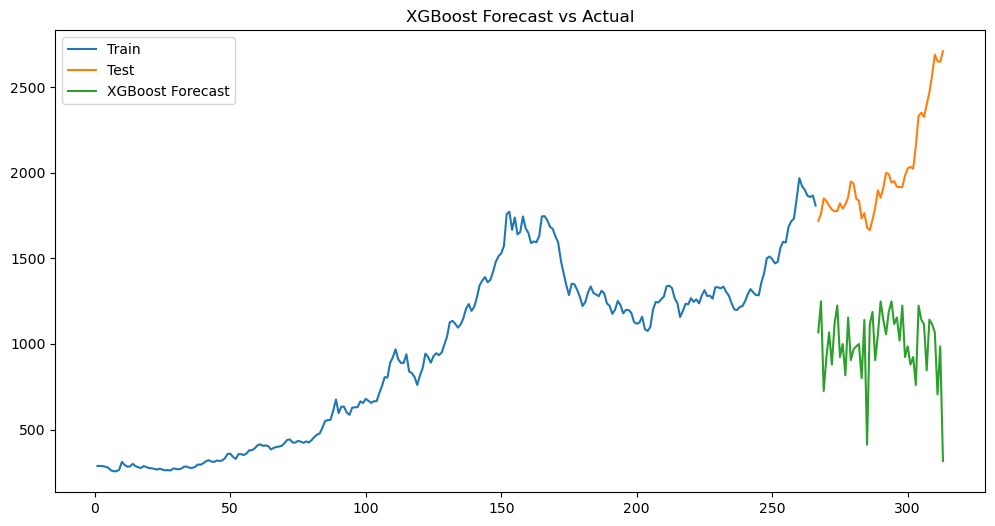

Evaluation Metrics:
MSE: 1145944.2970
MAE: 1001.1856
RMSE: 1070.49
MAPE: 0.49
Forecast Gold Price for Future Dates:
            Forecast Gold Price
2025-02-01          1131.654663
2025-03-01           668.006897
2025-04-01           985.507263
2025-05-01          1151.644897


In [45]:
model_XGBoost = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
model_XGBoost.fit(train_X2, train_y)
def evaluate_xgboost(model, X_train, y_train, X_test, y_test, future_exog=None):
    y_pred = model.predict(X_test)

    plt.figure(figsize=(12,6))
    plt.plot(y_train.index, y_train, label='Train')
    plt.plot(y_test.index, y_test, label='Test')
    plt.plot(y_test.index, y_pred, label='XGBoost Forecast')
    plt.legend()
    plt.title("XGBoost Forecast vs Actual")
    plt.show()
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    from sklearn.metrics import mean_absolute_percentage_error    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print("Evaluation Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}")
    
    future_preds = None
    if future_exog is not None:
        future_preds_array = model.predict(future_exog)
        future_preds = pd.DataFrame({
            'Forecast Gold Price': future_preds_array
        }, index=future_exog.index)

        print("Forecast Gold Price for Future Dates:")
        print(future_preds)

    return y_pred, future_preds

XGBooost_forecast, future_pred = evaluate_xgboost(
    model_XGBoost,
    train_X2,
    train_y,
    test_X2,
    test_y,
    future_exog=future_exog2
)

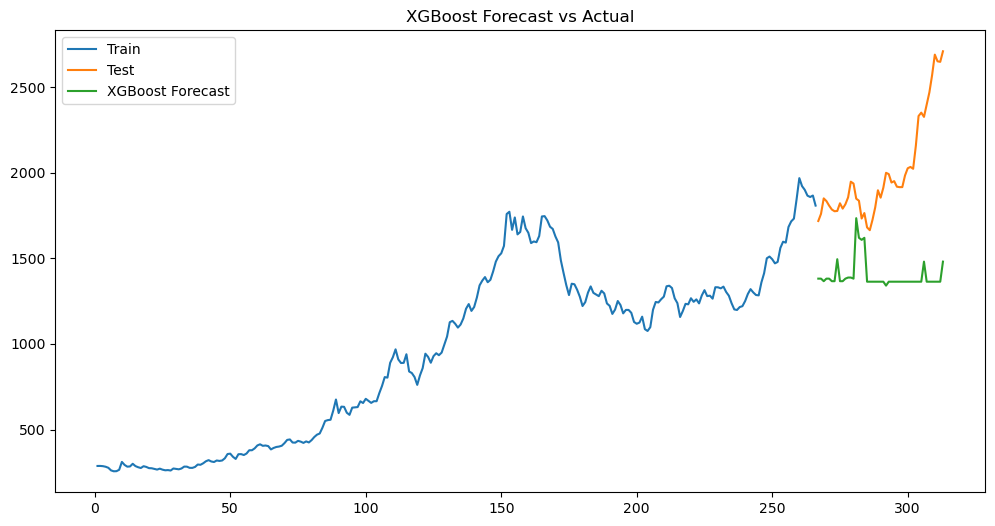

Evaluation Metrics:
MSE: 465423.3049
MAE: 605.7580
RMSE: 682.22
MAPE: 0.29
Forecast Gold Price for Future Dates:
            Forecast Gold Price
2025-02-01           306.275726
2025-03-01           306.275726
2025-04-01           306.275726
2025-05-01           306.275726


In [46]:
model_XGBoost = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
model_XGBoost.fit(train_X3, train_y)
def evaluate_xgboost(model, X_train, y_train, X_test, y_test, future_exog=None):
    y_pred = model.predict(X_test)

    plt.figure(figsize=(12,6))
    plt.plot(y_train.index, y_train, label='Train')
    plt.plot(y_test.index, y_test, label='Test')
    plt.plot(y_test.index, y_pred, label='XGBoost Forecast')
    plt.legend()
    plt.title("XGBoost Forecast vs Actual")
    plt.show()
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    from sklearn.metrics import mean_absolute_percentage_error    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print("Evaluation Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}")
    
    future_preds = None
    if future_exog is not None:
        future_preds_array = model.predict(future_exog)
        future_preds = pd.DataFrame({
            'Forecast Gold Price': future_preds_array
        }, index=future_exog.index)

        print("Forecast Gold Price for Future Dates:")
        print(future_preds)

    return y_pred, future_preds

XGBooost_forecast, future_pred = evaluate_xgboost(
    model_XGBoost,
    train_X3,
    train_y,
    test_X3,
    test_y,
    future_exog=future_exog3
)

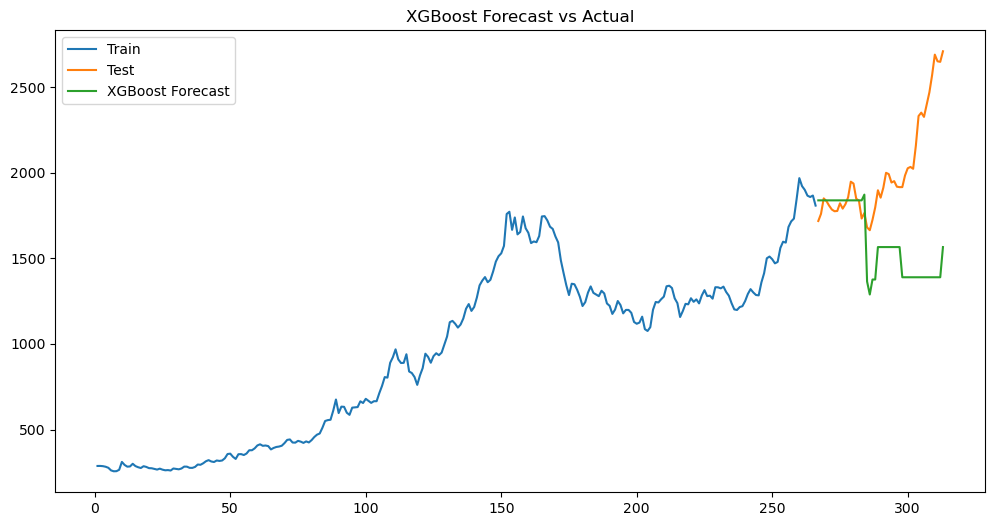

Evaluation Metrics:
MSE: 355986.2375
MAE: 438.2585
RMSE: 596.65
MAPE: 0.20
Forecast Gold Price for Future Dates:
            Forecast Gold Price
2025-02-01          1565.876343
2025-03-01          1565.876343
2025-04-01          1565.876343
2025-05-01          1376.336182


In [47]:
model_XGBoost = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
model_XGBoost.fit(train_X4, train_y)
def evaluate_xgboost(model, X_train, y_train, X_test, y_test, future_exog=None):
    y_pred = model.predict(X_test)

    plt.figure(figsize=(12,6))
    plt.plot(y_train.index, y_train, label='Train')
    plt.plot(y_test.index, y_test, label='Test')
    plt.plot(y_test.index, y_pred, label='XGBoost Forecast')
    plt.legend()
    plt.title("XGBoost Forecast vs Actual")
    plt.show()
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    from sklearn.metrics import mean_absolute_percentage_error    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print("Evaluation Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}")
    
    future_preds = None
    if future_exog is not None:
        future_preds_array = model.predict(future_exog)
        future_preds = pd.DataFrame({
            'Forecast Gold Price': future_preds_array
        }, index=future_exog.index)

        print("Forecast Gold Price for Future Dates:")
        print(future_preds)

    return y_pred, future_preds

XGBooost_forecast, future_pred = evaluate_xgboost(
    model_XGBoost,
    train_X4,
    train_y,
    test_X4,
    test_y,
    future_exog=future_exog4)

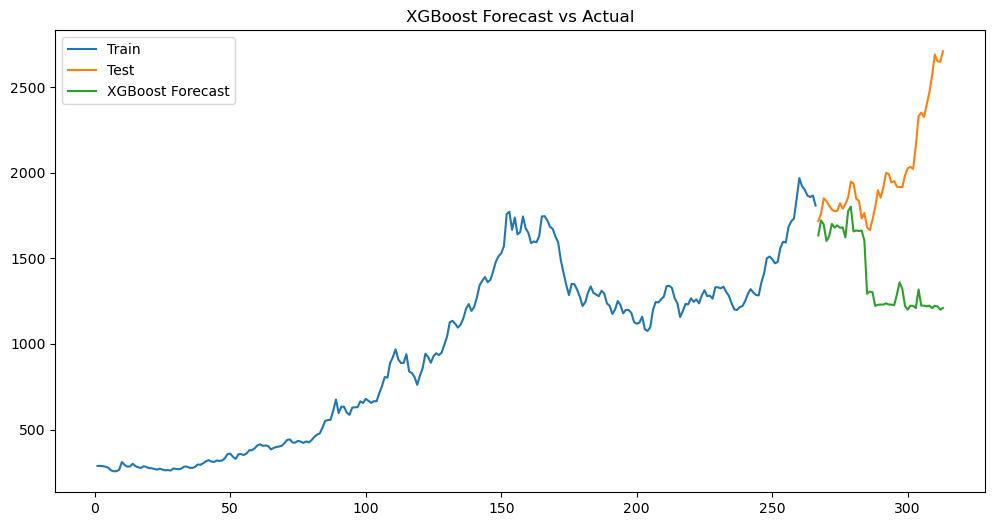

Evaluation Metrics:
MSE: 555029.1169
MAE: 595.5130
RMSE: 745.00
MAPE: 0.28
Forecast Gold Price for Future Dates:
            Forecast Gold Price
2025-02-01          1427.560669
2025-03-01          1416.289917
2025-04-01          1418.043823
2025-05-01          1414.694946


In [48]:
model_XGBoost = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
model_XGBoost.fit(train_X5, train_y)
def evaluate_xgboost(model, X_train, y_train, X_test, y_test, future_exog=None):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score


    y_pred = model.predict(X_test)

    plt.figure(figsize=(12, 6))
    plt.plot(y_train.index, y_train, label='Train')
    plt.plot(y_test.index, y_test, label='Test')
    plt.plot(y_test.index, y_pred, label='XGBoost Forecast')
    plt.legend()
    plt.title("XGBoost Forecast vs Actual")
    plt.show()

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Evaluation Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}")

    future_preds = None
    if future_exog is not None:
        future_preds_array = model.predict(future_exog)
        future_preds = pd.DataFrame({
            'Forecast Gold Price': future_preds_array
        }, index=future_exog.index)

        print("Forecast Gold Price for Future Dates:")
        print(future_preds)

    return y_pred, future_preds

XGBooost_forecast, future_pred = evaluate_xgboost(
    model_XGBoost,
    train_X5,
    train_y,
    test_X5,
    test_y,
    future_exog=future_exog5
)


We conclude that using ARIMAX is better than using XGBoost because the MAE and MAPE for ARIMAX are smaller than XGBoost